# Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os
import numpy as np
import pandas as pd
import gradio

# Data Preprocessing

In [2]:
train_datagen = ImageDataGenerator(
            rescale = 1/255.,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4)

val_test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:\\chest_xray\\train", 
                                              class_mode = "binary",
                                              batch_size = 32, 
                                              target_size = (224, 224))

validation_set = val_test_datagen.flow_from_directory("D:\\chest_xray\\val", 
                                                      class_mode = "binary", 
                                                      batch_size = 32, 
                                                      target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory("D:\\chest_xray\\test", 
                                                class_mode = "binary", 
                                                batch_size = 32, 
                                                target_size = (224, 224))

C:\Users\amitr\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#  Building the CNN

In [13]:
model1 = Sequential()

#convolutional neural networks - CNNs
model1.add(Conv2D(32, (3,3), strides = (1, 1),activation = "relu", padding = "same", input_shape = (224, 224, 3)))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(64, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
# model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Conv2D(128, (3,3), strides = (1, 1), padding = "same", activation = "relu"))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())

#fully connected layer
# model1.add(Dense(128, activation = "relu"))
model1.add(Dense(64, activation = "relu"))
model1.add(Dense(32, activation = "relu"))
model1.add(Dense(1, activation = "sigmoid"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 128)     

# Training the CNN

In [16]:
import tensorflow as tf
callbacks = [
tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                     patience=5,
                                     min_lr=0.000001,
                                     verbose=1)]

Metrics=['accuracy',
         [tf.keras.metrics.AUC(name='auc')],
         [tf.keras.metrics.Recall(name='recall')],
         [tf.keras.metrics.Precision(name='precision')]]

# Compiling the CNN

In [17]:
model1.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = Metrics)

# Training the CNN on the Training set and evaluating it on the Test set

In [18]:
history = model1.fit_generator(train_set, 
                               epochs = 80,
                               validation_data = test_set,
                               steps_per_epoch = 100,
                              )

C:\Users\amitr\AppData\Local\Temp\ipykernel_13964\437672585.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(train_set,


Epoch 1/80
100/100 [==============================] - 108s 1s/step - loss: 0.2910 - accuracy: 0.8678 - auc: 0.9271 - recall: 0.9011 - precision: 0.9207 - val_loss: 0.8751 - val_accuracy: 0.6891 - val_auc: 0.8850 - val_recall: 0.9949 - val_precision: 0.6690
Epoch 2/80
100/100 [==============================] - 100s 997ms/step - loss: 0.2687 - accuracy: 0.8841 - auc: 0.9394 - recall: 0.9089 - precision: 0.9322 - val_loss: 0.4101 - val_accuracy: 0.8333 - val_auc: 0.9311 - val_recall: 0.9282 - val_precision: 0.8265
Epoch 3/80
100/100 [==============================] - 97s 968ms/step - loss: 0.2767 - accuracy: 0.8772 - auc: 0.9345 - recall: 0.8998 - precision: 0.9324 - val_loss: 0.4116 - val_accuracy: 0.8494 - val_auc: 0.9186 - val_recall: 0.8385 - val_precision: 0.9134
Epoch 4/80
100/100 [==============================] - 95s 950ms/step - loss: 0.2754 - accuracy: 0.8822 - auc: 0.9387 - recall: 0.9149 - precision: 0.9254 - val_loss: 0.5816 - val_accuracy: 0.7901 - val_auc: 0.8987 - val_reca

# Plot the Performence

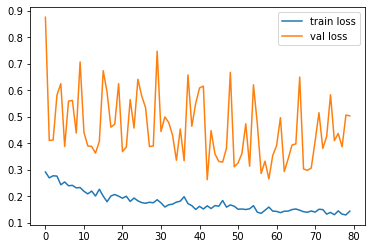

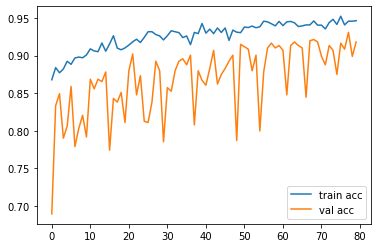

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')